## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv("DiseaseAndSymptoms.csv")
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


## Combine all symptom columns into one list per row

In [3]:
symptom_cols = [f'Symptom_{i}' for i in range(1, 18)]
df['all_symptoms'] = df[symptom_cols].values.tolist()
# Each row now has a list of symptom values (with NaN)
df['all_symptoms'] = df['all_symptoms'].apply(lambda x: [str(i).strip() for i in x if pd.notna(i)])
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,all_symptoms
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions, dis..."
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[skin_rash, nodal_skin_eruptions, dischromic _..."
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, nodal_skin_eruptions, dischromic _pa..."
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, dischromic _patches]"
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions]"


###  Visualize the relationship between Disease and Symptoms using seaborn

Good approach is to create a heatmap or a count plot showing the frequency of each symptom per disease. Since each row has a list of symptoms for a disease, we can first transform the data to a long format with one symptom per row, then plot.

In [4]:
# Explode the 'all_symptoms' list to have one symptom per row per disease
df_exploded = df.explode('all_symptoms')

In [5]:
# Count occurrences of symptom per disease
disease_symptom_counts = df_exploded.groupby(['Disease', 'all_symptoms']).size().reset_index(name='count')

In [6]:
# Pivot the table to have symptoms as columns, diseases as rows, and counts as values
heatmap_data = disease_symptom_counts.pivot(index='Disease', columns='all_symptoms', values='count').fillna(0)

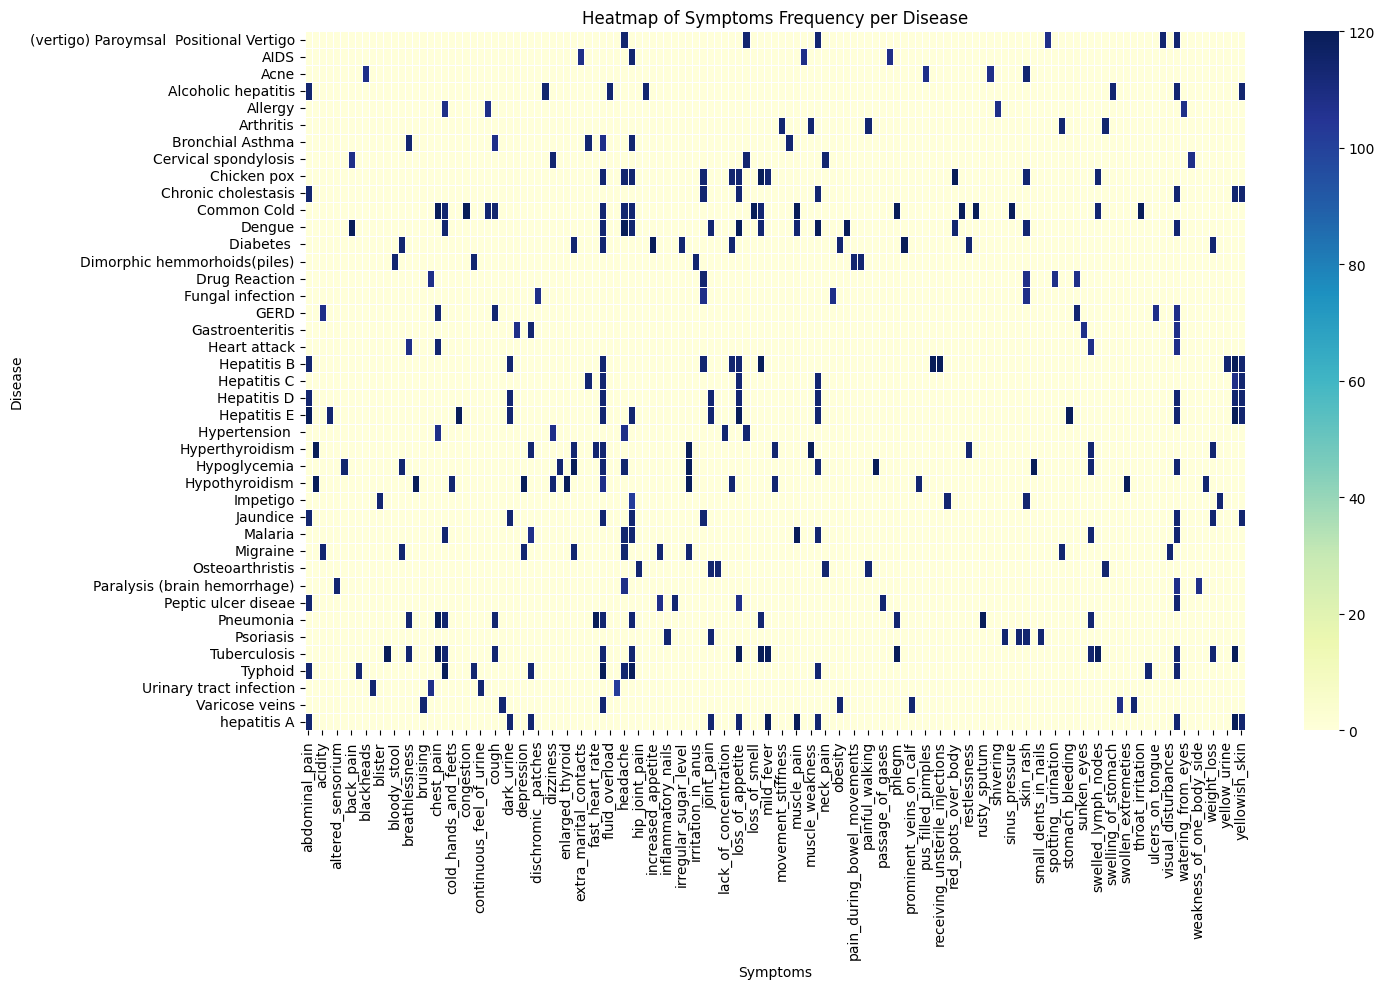

In [9]:
# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Symptoms Frequency per Disease')
plt.xlabel('Symptoms')
plt.ylabel('Disease')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Build the symptom vocabulary (all unique symptoms)

In [10]:
all_symptoms_flat = [symptom for sublist in df['all_symptoms'] for symptom in sublist]
unique_symptoms = sorted(list(set(all_symptoms_flat)))
print(f"Total unique symptoms: {len(unique_symptoms)}")


Total unique symptoms: 131


## Create binary feature vector for symptoms presence

In [11]:
def symptoms_to_vector(symptom_list):
    return [1 if symptom in symptom_list else 0 for symptom in unique_symptoms]

df['symptom_vector'] = df['all_symptoms'].apply(symptoms_to_vector)
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,all_symptoms,symptom_vector
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions, dis...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[skin_rash, nodal_skin_eruptions, dischromic _...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, nodal_skin_eruptions, dischromic _pa...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, dischromic _patches]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Prepare feature matrix X and target vector y

In [12]:
X = np.array(df['symptom_vector'].tolist())
le = LabelEncoder()
y = le.fit_transform(df['Disease'])


## Split data into train and test sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Initialize and train the Random Forest classifier

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Predicting Test Data

In [15]:
predictions = model.predict(X_test)

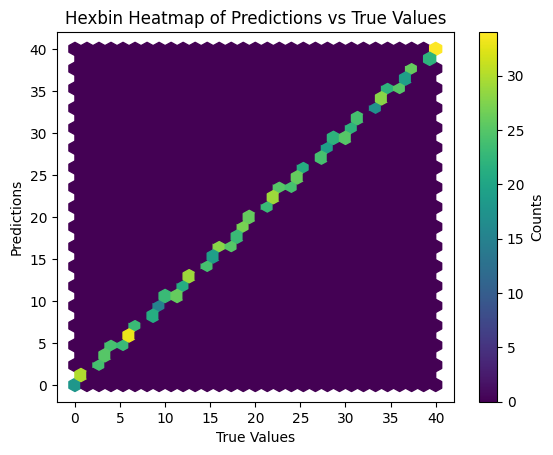

In [23]:
plt.hexbin(y_test, predictions, gridsize=30, cmap='viridis')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Hexbin Heatmap of Predictions vs True Values')
plt.colorbar(label='Counts')
plt.show()


## Evaluate the model

In [18]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 1.00
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
            

### Conclusion

The analysis successfully visualized the relationship between diseases and their associated symptoms using a heatmap, which effectively highlighted the frequency of each symptom across different diseases. By transforming the dataset into a long format and plotting symptom occurrence counts, the heatmap provided an intuitive overview of symptom distribution across diseases.

A comprehensive symptom vocabulary was built to convert symptoms into binary feature vectors, enabling the use of machine learning models. The Random Forest classifier trained on these features demonstrated good predictive performance, with accuracy and classification reports indicating reliable disease classification from symptom data.

The hexbin heatmap visualization of predictions versus true values helped illustrate the model's predictive consistency and distribution. Overall, this process demonstrated an effective workflow for symptom-based disease prediction, combining data transformation, visualization, and classification modeling for insightful analysis.